In [1]:

# 201 session

import tensorflow as tf


In [2]:
m1 = tf.constant([[2, 2]])
m2 = tf.constant([[3],
                  [3]])
dot_operation = tf.matmul(m1, m2)


In [3]:
print(dot_operation)  # wrong! no result


Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [4]:
# method1 use session
sess = tf.Session()
result = sess.run(dot_operation)
print(result)
sess.close()

[[12]]


In [5]:
# method2 use session
with tf.Session() as sess:
    result_ = sess.run(dot_operation)
    print(result_)

[[12]]


In [6]:
# 202 placeholder
import tensorflow as tf


In [7]:
x1 = tf.placeholder(dtype=tf.float32, shape=None)
y1 = tf.placeholder(dtype=tf.float32, shape=None)
z1 = x1 + y1

In [8]:
x2 = tf.placeholder(dtype=tf.float32, shape=[2, 1])
y2 = tf.placeholder(dtype=tf.float32, shape=[1, 2])
z2 = tf.matmul(x2, y2)

In [9]:
with tf.Session() as sess:
     # when only one operation to run
    z1_value = sess.run(z1, feed_dict={x1: 1, y1: 2})

    # when run multiple operations
    z1_value, z2_value = sess.run(
        [z1, z2],       # run them together
        feed_dict={
            x1: 1, y1: 2,
            x2: [[2], [2]], y2: [[3, 3]]
        })
    print(z1_value)
    print(z2_value)

3.0
[[ 6.  6.]
 [ 6.  6.]]


In [10]:
# 203 var
import tensorflow as tf


In [11]:
var = tf.Variable(0)    # our first variable in the "global_variable" set


In [12]:
add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)

In [13]:
with tf.Session() as sess:
    # once define variables, you have to initialize them by doing this
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

1
2
3


In [15]:
#activation

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# fake data
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)

In [17]:
# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)
# y_softmax = tf.nn.softmax(x)  softmax is a special kind of activation function, it is about probability


In [18]:
sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

In [19]:
# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

In [20]:
plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

In [21]:
plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

In [22]:
plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

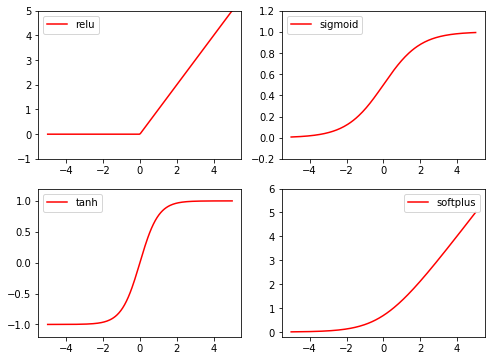

In [23]:
plt.show()

In [24]:
# 301 simple regression
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [25]:
tf.set_random_seed(1)
np.random.seed(1)


In [26]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


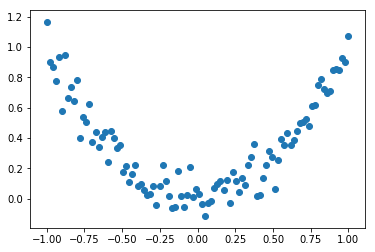

In [27]:
# plot data
plt.scatter(x, y)
plt.show()

In [28]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

In [29]:
# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 1)                     # output layer

In [30]:
loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)


In [31]:
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph


In [32]:
plt.ion()   # something about plotting

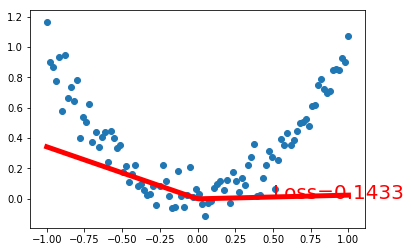

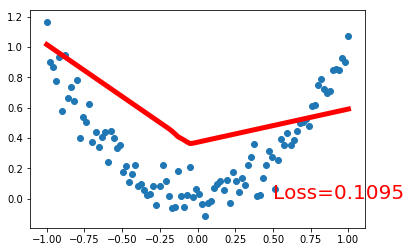

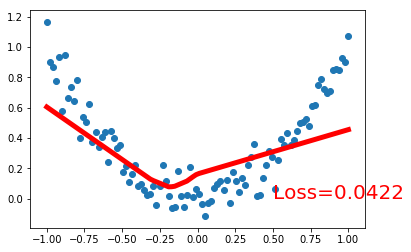

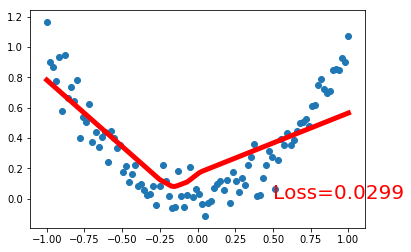

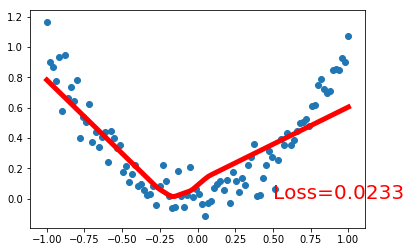

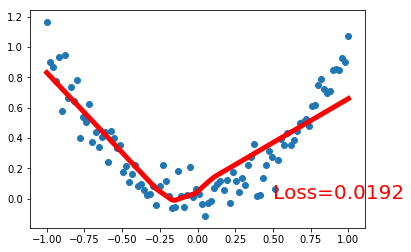

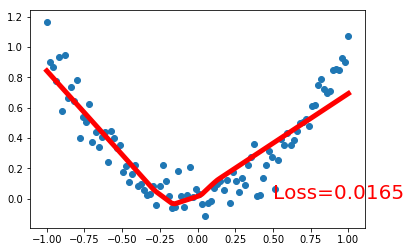

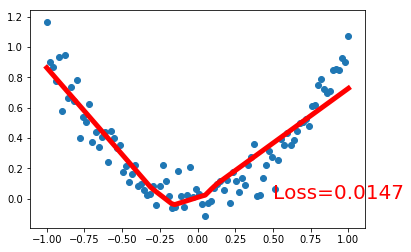

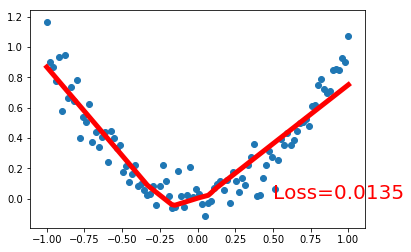

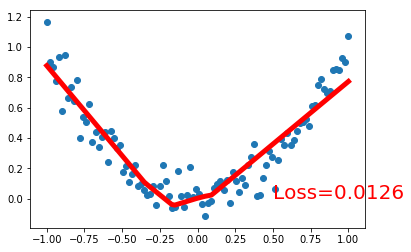

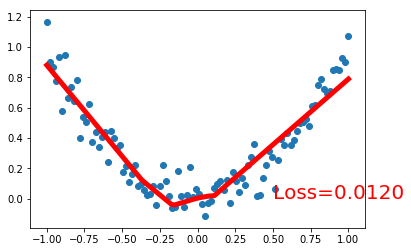

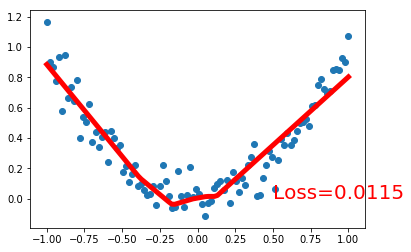

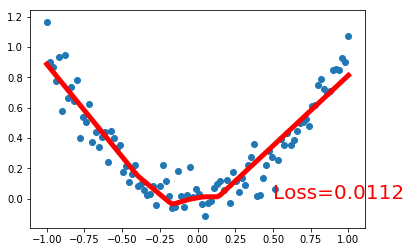

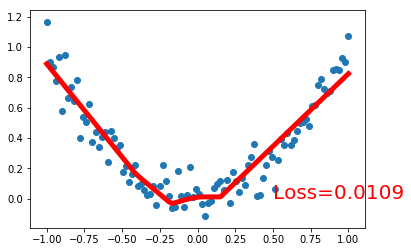

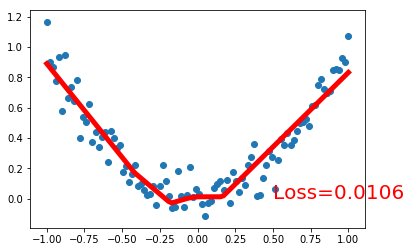

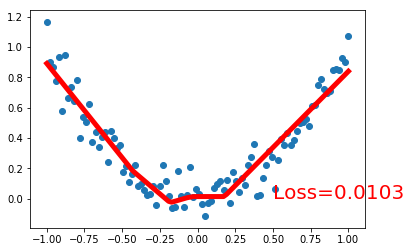

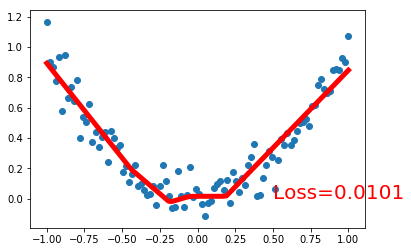

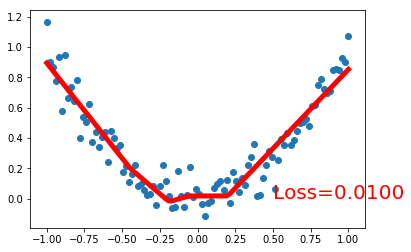

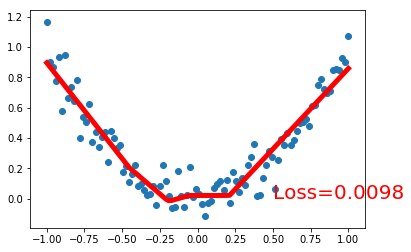

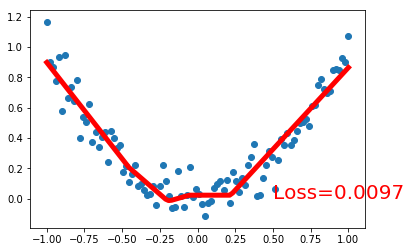

In [33]:
for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)


In [34]:
plt.ioff()

In [35]:
plt.show()

In [36]:
#302 simple classification
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [37]:
tf.set_random_seed(1)
np.random.seed(1)

In [38]:
# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, 1)
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100, 1)
x = np.vstack((x0, x1))  # shape (200, 2) + some noise
y = np.hstack((y0, y1))  # shape (200, )

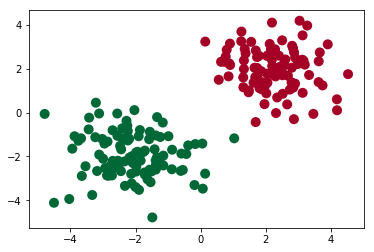

In [39]:
# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [40]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.int32, y.shape)     # input y

In [41]:
# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 2)                     # output layer


In [42]:
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)           # compute cost
accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

In [43]:
sess = tf.Session()                                                                 # control training and others
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)     # initialize var in graph

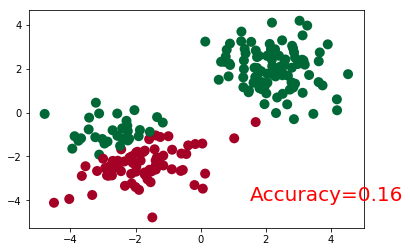

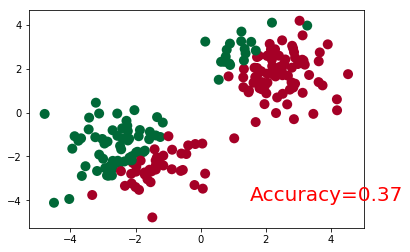

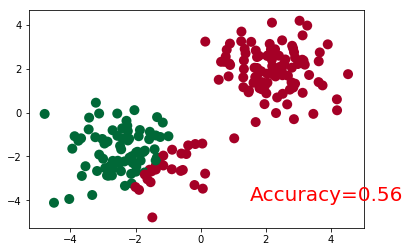

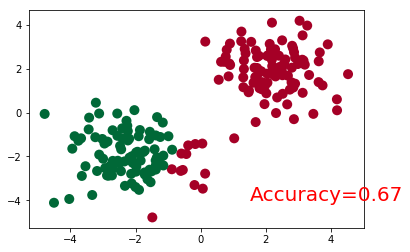

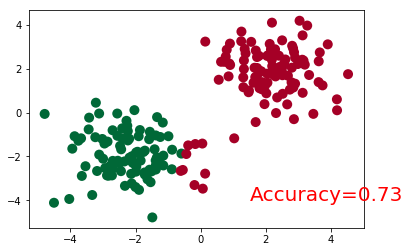

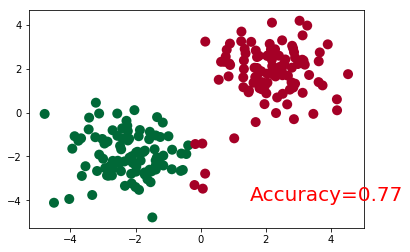

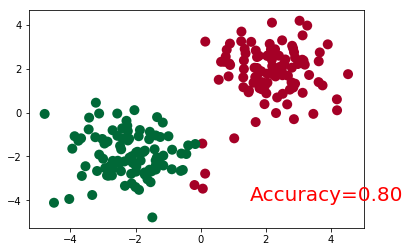

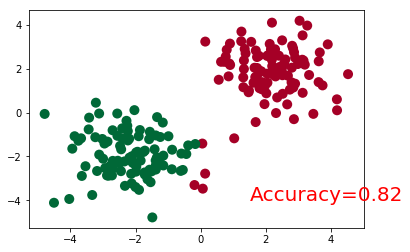

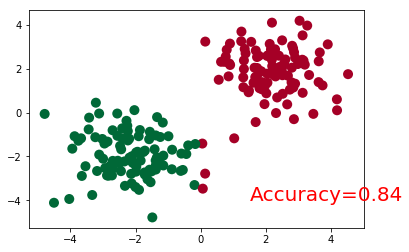

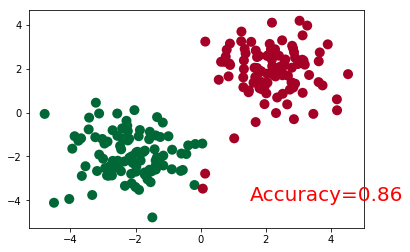

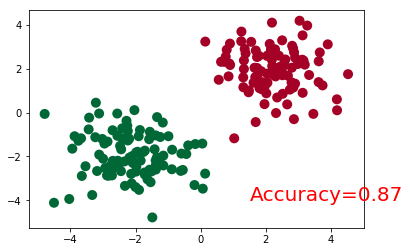

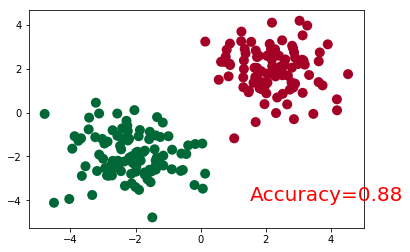

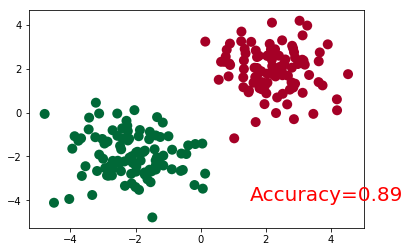

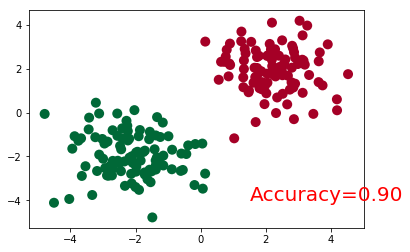

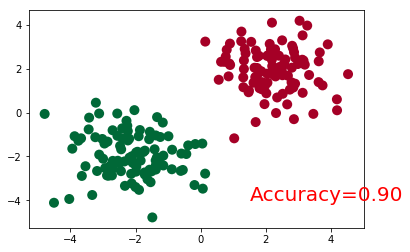

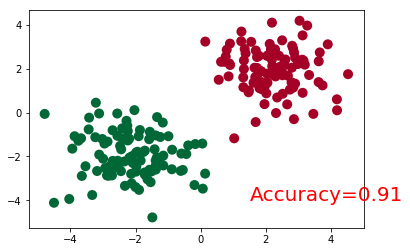

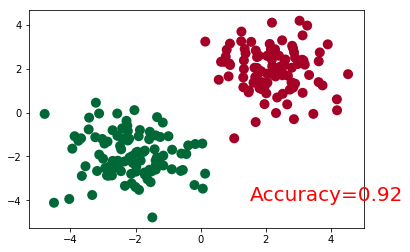

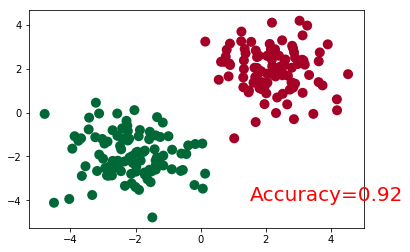

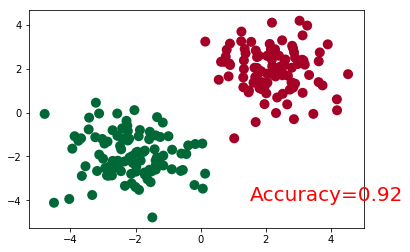

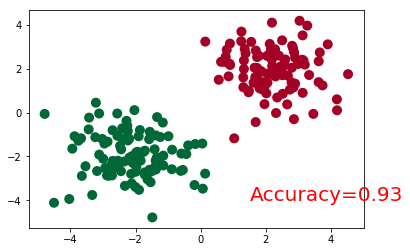

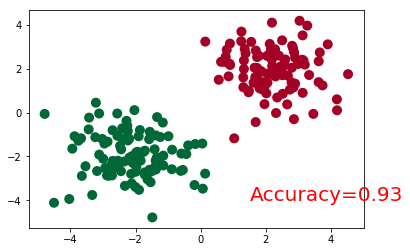

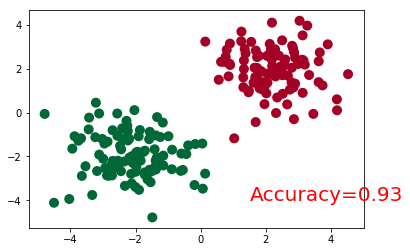

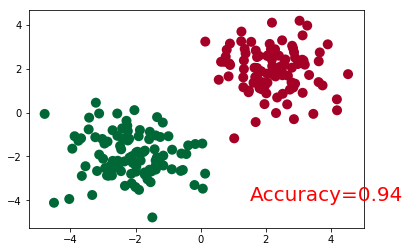

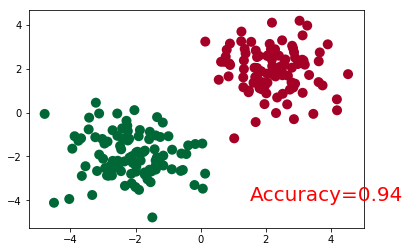

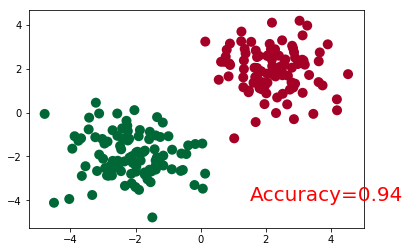

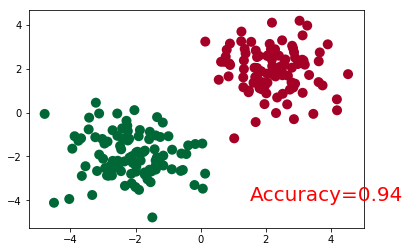

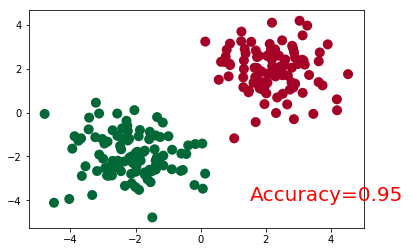

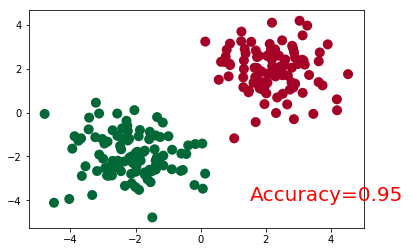

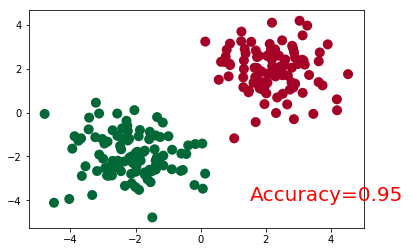

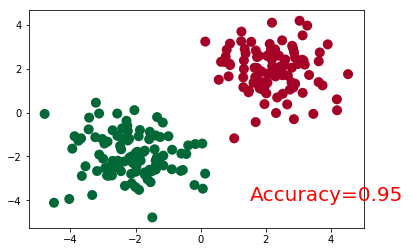

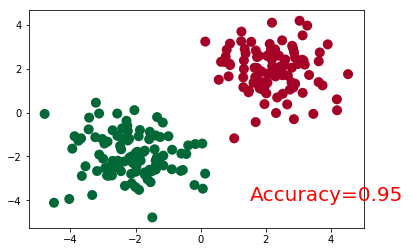

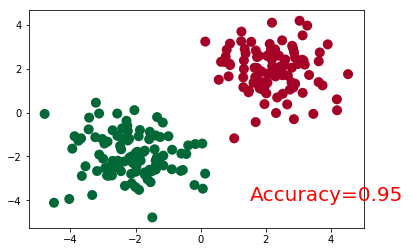

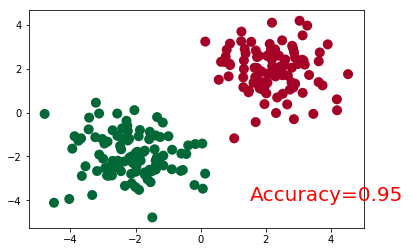

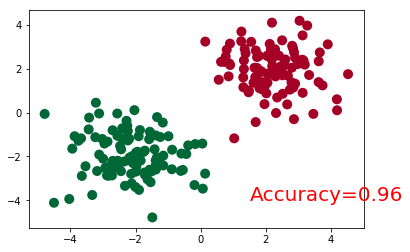

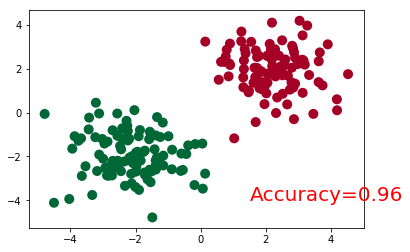

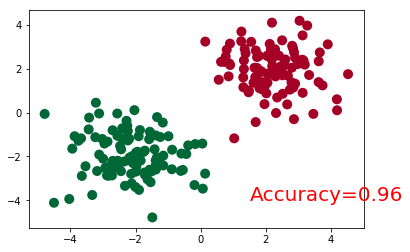

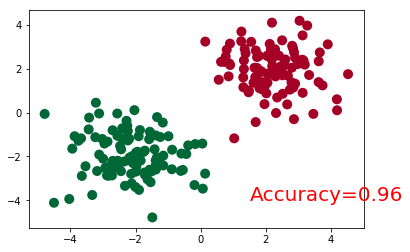

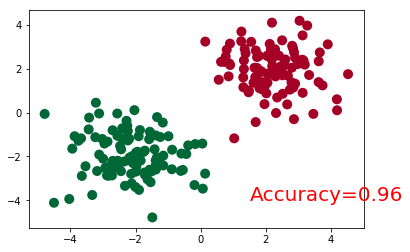

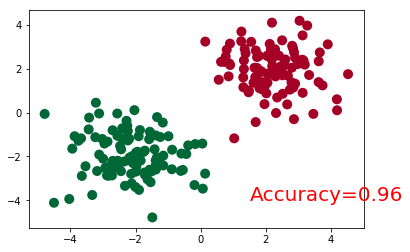

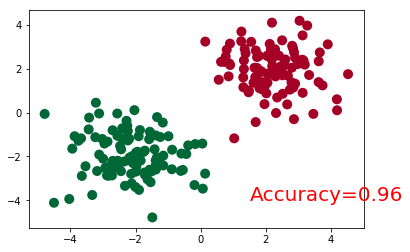

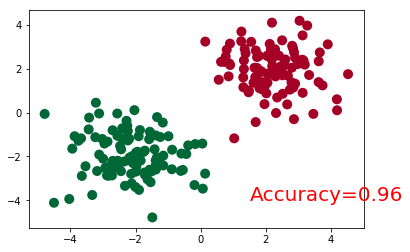

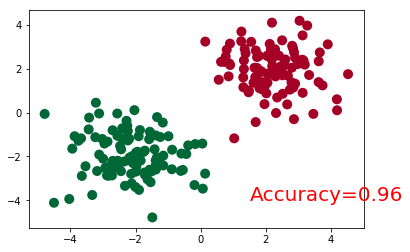

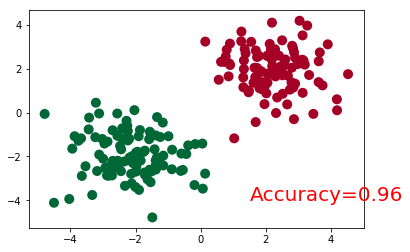

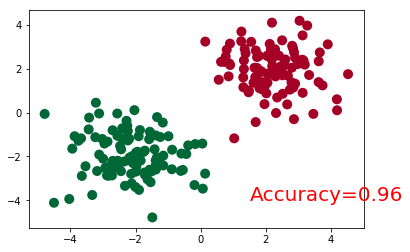

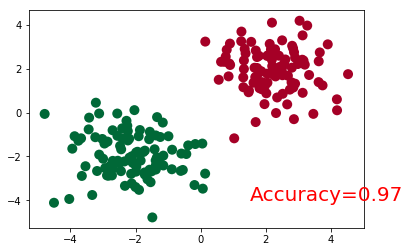

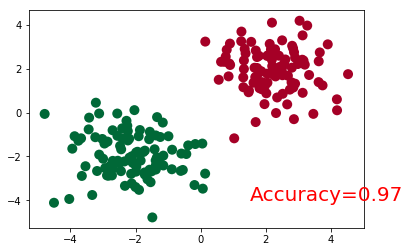

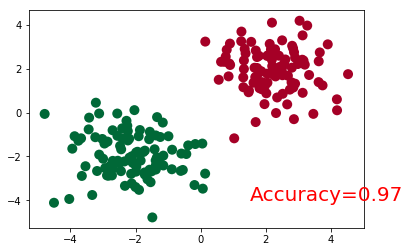

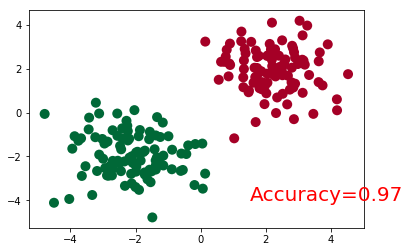

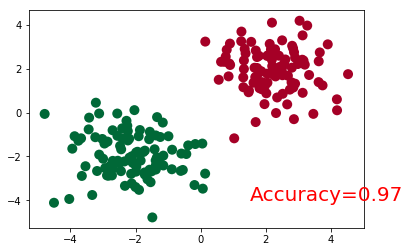

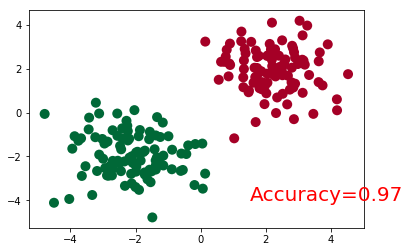

In [44]:
plt.ion()   # something about plotting
for step in range(100):
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step % 2 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()

In [45]:
plt.show()

In [46]:
#303 save reload
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [47]:
tf.set_random_seed(1)
np.random.seed(1)

In [48]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


In [49]:
def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o = tf.layers.dense(l, 1)                     # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  # initialize var in graph

    saver = tf.train.Saver()  # define a saver for saving and restoring

    for step in range(100):                             # train
        sess.run(train_op, {tf_x: x, tf_y: y})

    saver.save(sess, './params', write_meta_graph=False)  # meta_graph is not recommended

    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})


In [50]:
def reload():
    print('This is reload')
    # build entire net again and restore
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o_ = tf.layers.dense(l_, 1)                     # output layer
    loss_ = tf.losses.mean_squared_error(tf_y, o_)   # compute cost

    sess = tf.Session()
    # don't need to initialize variables, just restoring trained variables
    saver = tf.train.Saver()  # define a saver for saving and restoring
    saver.restore(sess, './params')

    # plotting
    pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()


This is save


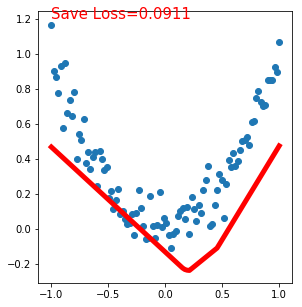

In [51]:
save()

In [52]:
# destroy previous net
tf.reset_default_graph()


This is reload
INFO:tensorflow:Restoring parameters from ./params


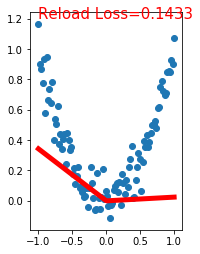

In [53]:
reload()

In [54]:
# 304 optim
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [55]:
tf.set_random_seed(1)
np.random.seed(1)

In [56]:
LR = 0.01
BATCH_SIZE = 32

In [57]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


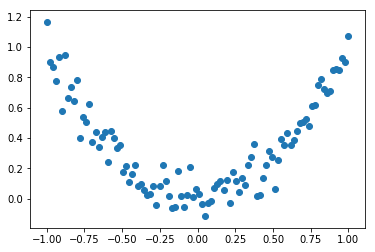

In [58]:
# plot dataset
plt.scatter(x, y)
plt.show()

In [59]:
# default network
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)

In [60]:
# different nets
net_SGD         = Net(tf.train.GradientDescentOptimizer)
net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop     = Net(tf.train.RMSPropOptimizer)
net_Adam        = Net(tf.train.AdamOptimizer)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]


In [61]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [62]:
losses_his = [[], [], [], []]   # record loss


In [63]:
# training
for step in range(300):          # for each training step
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]

    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)     # loss recoder

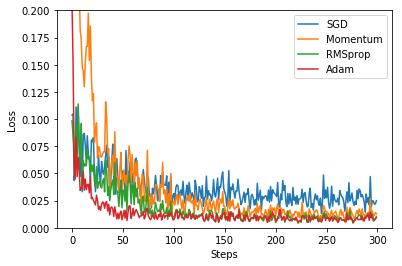

In [64]:
# plot loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

In [74]:
# 305 tensorboard
import tensorflow as tf
import numpy as np

In [75]:
tf.set_random_seed(1)
np.random.seed(1)

In [76]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


In [77]:
with tf.variable_scope('Inputs'):
    tf_x = tf.placeholder(tf.float32, x.shape, name='x')
    tf_y = tf.placeholder(tf.float32, y.shape, name='y')

In [78]:
with tf.variable_scope('Net'):
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu, name='hidden_layer')
    output = tf.layers.dense(l1, 1, name='output_layer')
    # add to histogram summary
    tf.summary.histogram('h_out', l1)
    tf.summary.histogram('pred', output)

ValueError: Variable Net/hidden_layer/kernel already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)


In [81]:
loss = tf.losses.mean_squared_error(tf_y, output, scope='loss')
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
tf.summary.scalar('loss', loss)     # add loss to scalar summary
sess = tf.Session()
sess.run(tf.global_variables_initializer())

writer = tf.summary.FileWriter('./log', sess.graph)     # write to file
merge_op = tf.summary.merge_all()                       # operation to merge all summary

for step in range(100):
    # train and net output
    _, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})
    writer.add_summary(result, step)

# Lastly, in your terminal or CMD, type this :
# $ tensorboard --logdir path/to/log
# open you google chrome, type the link shown on your terminal or CMD. (something like this: http://localhost:6006)


InvalidArgumentError: You must feed a value for placeholder tensor 'Inputs/x' with dtype float and shape [100,1]
	 [[Node: Inputs/x = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Inputs/x', defined at:
  File "C:\Users\Administrator\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Administrator\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-68-d6a087f99868>", line 2, in <module>
    tf_x = tf.placeholder(tf.float32, x.shape, name='x')
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Inputs/x' with dtype float and shape [100,1]
	 [[Node: Inputs/x = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


InvalidArgumentError: You must feed a value for placeholder tensor 'Inputs/x' with dtype float and shape [100,1]
	 [[Node: Inputs/x = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Inputs/x', defined at:
  File "C:\Users\Administrator\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Administrator\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-68-d6a087f99868>", line 2, in <module>
    tf_x = tf.placeholder(tf.float32, x.shape, name='x')
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Inputs/x' with dtype float and shape [100,1]
	 [[Node: Inputs/x = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
